<a href="https://colab.research.google.com/github/SimoneKris/KGS-Data-Analytics-Portfolio/blob/main/Copy_of_Milestone_Project_3_Mass_Shootings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate

Step One: The industry that I have choosen to explore is Law Enforcement/Crime Statistics.

In [ ]:
from google.colab import files
Mass_shootings_1982_2022= files.upload()

Saving Mass_Shooting_1982_2022.csv to Mass_Shooting_1982_2022.csv


Step Two: I am going to focus on Law Enforcemnet and Mental Health and how the two go hand-and hand with regards to Mass Shootings in the United States. 

  I have choosen to explore a data set on Mass Shooting in the United States from 1982-20222. I was drawn to this topic because there is always an increase in Gun Laws or the need for them after a mass shooting happens.  Yet, each time we. learn that there were some form of warning signs by each shooter that had they been recoginzed, perhaps the shooting coould have been prevented.  

  I wanted to look at how many of the shooters over the years had some form of known mental health issues.  Than I wanted to know how were they able to obtain a gun, if mental health was a known factor with the shooter. Finally, I wanted to know where these shootings happen the most often.   

Machine Learning Can be useful in this process on several levels.
1. To identify patterns in the shooter.
2. To determine if there are similarities between shooters and if so what those similarities are, and how can we use these to help prevent a future mass shooting.
3. Machine learning could also be used once we know so commoninalities between shooters, we may be able to profile a possible shooter, which in turn could help re-direct the gun laws both on the State and Federal level.

In [ ]:
# Create Data Frame

df = pd.read_csv('Mass_Shooting_1982_2022.csv')


In [ ]:
# Data Wrangling- Checking through the Data set
df.head()

,place_of_shooting,city,state,date,summary,fatalities,injured,total_victims,location,age_of_shooter,...,year,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Greenwood Park Mall shooting,"Greenwood, Indiana",IN,7/17/22,"Jonathan Sapirman, 20, opened fire in a mall f...",3.0,2,5,workplace,20.0,...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Highland Park July 4 parade shooting,"Highland Park, Illinois",IL,7/4/22,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7.0,46,53,Other,21.0,...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Church potluck dinner shooting,"Birmingham, Alabama",AL,6/16/22,"Robert Findlay Smith, 70, opened fire with a h...",3.0,0,3,religious,70.0,...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Concrete company shooting,"Smithsburg, Maryland",MD,6/9/22,The suspected 23-year-old gunman shot four cow...,3.0,1,4,workplace,23.0,...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tulsa medical center shooting,"Tulsa, Oklahoma",OK,6/1/22,"Michael Louis, 45, killed four, including two ...",4.0,"(TK - ""fewer than 10""",TK,workplace,45.0,...,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Droping Unnamed Columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
# Checking to see that Unnamed columns were removed
df.head()

,place_of_shooting,city,state,date,summary,fatalities,injured,total_victims,location,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,type,year
0,Greenwood Park Mall shooting,"Greenwood, Indiana",IN,7/17/22,"Jonathan Sapirman, 20, opened fire in a mall f...",3.0,2,5,workplace,20.0,NaN,NaN,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,Mass,2022.0
1,Highland Park July 4 parade shooting,"Highland Park, Illinois",IL,7/4/22,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7.0,46,53,Other,21.0,NaN,NaN,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,Mass,2022.0
2,Church potluck dinner shooting,"Birmingham, Alabama",AL,6/16/22,"Robert Findlay Smith, 70, opened fire with a h...",3.0,0,3,religious,70.0,NaN,NaN,yes,Unknown,semiautomatic handgun,NaN,White,M,Mass,2022.0
3,Concrete company shooting,"Smithsburg, Maryland",MD,6/9/22,The suspected 23-year-old gunman shot four cow...,3.0,1,4,workplace,23.0,NaN,NaN,NaN,Unknown,semiautomatic handgun,NaN,White,M,Mass,2022.0
4,Tulsa medical center shooting,"Tulsa, Oklahoma",OK,6/1/22,"Michael Louis, 45, killed four, including two ...",4.0,"(TK - ""fewer than 10""",TK,workplace,45.0,NaN,NaN,yes,Unknown,semiautomatic rifle; semiautomatic handgun,AR-15 style rifle,Black,M,Mass,2022.0


In [ ]:
# Droping NaN Values
df.dropna(inplace = True)

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^mental_health_details')]

In [ ]:
df.head()

,place_of_shooting,city,state,date,summary,fatalities,injured,total_victims,location,age_of_shooter,prior_signs_mental_health_issues,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,type,year
6,Buffalo supermarket massacre,"Buffalo, New York",NY,5/14/22,"Payton S. Gendron, 18, committed a racially mo...",10.0,3,13,workplace,18.0,yes,yes,Unknown,semiautomatic rifle,Bushmaster XM-15 semiautomatic rifle,White,M,Mass,2022.0
12,Boulder supermarket shooting,"Boulder, Colorado",CO,3/22/21,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10.0,0,10,Workplace,21.0,yes,Yes,Unknown,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,Brown,M,Mass,2021.0
25,SunTrust bank shooting,"Sebring, Florida",FL,1/23/19,"Zephen A. Xaver, 21, fatally shot five women i...",5.0,0,5,Workplace,21.0,Yes,Yes,Unknown,handgun,9 mm handgun,White,M,Mass,2019.0
27,Thousand Oaks nightclub shooting,"Thousand Oaks, California",CA,11/7/18,"Ian David Long, 28, dressed in black and armed...",12.0,22,34,Other,28.0,Yes,Yes,A gun store in Simi Valley,semiautomatic handgun,"Glock 21, .45 caliber; high-capacity magazine",-,M,Mass,2018.0
31,Fifth Third Center shooting,"Cincinnati, Ohio",OH,9/6/18,"Omar Enrique Santa Perez, 29, walked into the ...",3.0,2,5,Workplace,29.0,Yes,Yes,A local gun store,semiautomatic handgun,9mm handgun,Latino,M,Mass,2018.0


In [ ]:
#Encoding- converting yes or no on wether guns were obtained legally

df.loc[df['weapons_obtained_legally'] == 'yes', 'legal'] = 1
df.loc[df['weapons_obtained_legally'] == 'no', 'legal'] = 0



In [ ]:
#Encoding- Converting whether Mental health issues were detected prior tyo shooting.
df.loc[df['prior_signs_mental_health_issues'] == 'yes', 'signs'] = 1
df.loc[df['prior_signs_mental_health_issues'] == 'no', 'signs'] = 0

In [ ]:
import plotly.graph_objects as go
import numpy as np

In [ ]:
df_cor = df.corr()

In [ ]:
# initialize an empty object
fig = go.Figure()

# add 'elements' to empty object
fig.add_trace(
    go.Heatmap(
        x = df_cor.columns,
        y = df_cor.index,
        z = np.array(df_cor) # converting a dataframe to an array
    )
)

In [ ]:
# Let's make some more plots...

import plotly.express as px

In [ ]:
px.histogram(data_frame = df, x = 'age_of_shooter', nbins=30)

In [ ]:
df['location'] = df['location'].replace('workplce','Workplace')
print(df)

                         place_of_shooting                       city state  \
6             Buffalo supermarket massacre          Buffalo, New York    NY   
12            Boulder supermarket shooting          Boulder, Colorado    CO   
25                  SunTrust bank shooting           Sebring, Florida    FL   
27        Thousand Oaks nightclub shooting  Thousand Oaks, California    CA   
31             Fifth Third Center shooting           Cincinnati, Ohio    OH   
..                                     ...                        ...   ...   
128        Shopping centers spree killings                   Palm Bay    FL   
129  United States Postal Service shooting                     Edmond    OK   
130         San Ysidro McDonald's massacre                 San Ysidro    CA   
131              Dallas nightclub shooting                     Dallas    TX   
132                  Welding shop shooting                      Miami    FL   

        date                                       

In [ ]:
px.histogram(data_frame =df, x = 'location', nbins =30)

In [ ]:
px.histogram(data_frame = df, x = 'state', nbins =30)

This is surprising to me to see California with the highest counts of mass shootings, followed by Texas. I am surprised by California as they have very strict gun laws. Texas, on the other hand, has less restrictive laws in addition to other factors, that may be contributing to the shootings.

In [ ]:
px.histogram(data_frame = df, x = 'prior_signs_mental_health_issues', nbins = 30)

By creating this graph it highlights that mental health issues is one of the main contributing factors in mass shooting.  Not only is it a factor, it is known.  With this data set we see that 56 of the 134 cases had some form of mental illness.  42% of the shooters were known to have menatl illness issues and yet they some how were able to purchase/obtain a gun.  This brings us to question #2.  If Mental illness was known, how were the guns purchased?

In [ ]:

px.box(data_frame = df, y = 'weapons_obtained_legally')

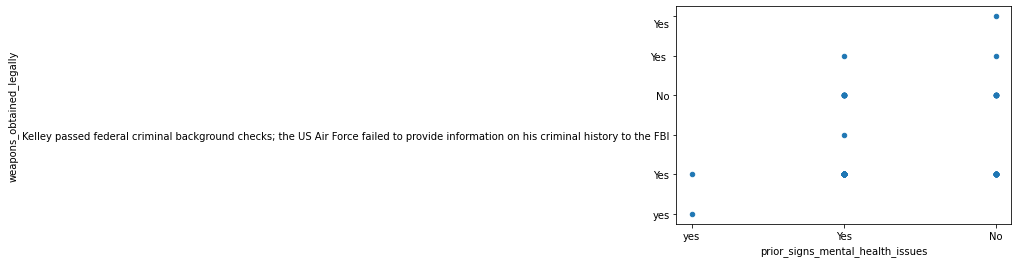

In [ ]:
import pandas as pd

df.plot.scatter(x = 'prior_signs_mental_health_issues', y = 'weapons_obtained_legally')

In [ ]:
y = df['weapons_obtained_legally']
X = df.drop(['type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
cv_accuracy = []
C_options = [0.01, 0.3, 0.5, 1, 2, 5, 10]

for option in C_options:
  pipe_l2     = Pipeline([('scaler', StandardScaler()), 
                      ('log_reg', LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C=option))])

  pipe_l2.fit(X_train, y_train)
  
  l2_scores = cross_val_score(pipe_l2, X_train, y_train, cv=10)
  l2_cv_accuracy = l2_scores.mean()

  cv_accuracy.append(l2_cv_accuracy)

ValueError: ignored